In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
Sim_res = Path.cwd().parent.parent / 'MagnetCode' / "Simulation Results"
Photos_dir = Path.cwd() / 'Images'
from scipy.optimize import minimize

# Сбор статистики

### 100-1200 базовое

In [2]:
DIR = Sim_res / 'Ising' / 'TrIs_Res' / 'energy'
if DIR.exists():
    dataset = list(DIR.glob('BC*.txt'))
    #print(*list(map(lambda x: x.name, dataset)), sep='\n')

In [3]:
def collect(dataset, full_data=None, sort=False):
    for d in dataset:
        data = pd.read_csv(d, sep=' ', index_col=False)
        if full_data is None:
            full_data = data
        else:
            full_data = pd.concat([full_data, data], ignore_index=True)
    if sort:
        full_data.sort_values(by=['J', 'N'], inplace=True, ignore_index=True)
    return full_data

data = collect(dataset, sort=True)

### крит-зона

In [4]:
DIR = Sim_res / 'Ising' / 'TrIs_crit' / 'energy'
dataset = list(DIR.glob('BC*.txt'))
#print(*list(map(lambda x: x.name, dataset)), sep='\n')

In [5]:
data = collect(dataset, data, True)

### Проверка 

In [6]:
data.head(5)

,N,J,h,mean_R_sq,err_mean_R_sq,mean_R_gyr_sq,err_mean_R_gyr_sq,mean_e,err_mean_e,mean_e_sq,err_mean_e_sq,mean_e_fourth,err_mean_e_fourth,mean_m,err_mean_m,mean_m_sq,err_mean_m_sq,mean_m_fourth,err_mean_m_fourth,Unnamed: 19
0,100,0.0,0,929,35,96.8226,0.057610,-0.000050,0.000199,0.024398,0.000035,0.001924,7.501960e-06,0.079668,0.000060,0.010019,0.000013,0.000299,9.058660e-07,105200000000
1,300,0.0,0,4910,73,486.1900,0.358418,-0.000024,0.000089,0.006794,0.000010,0.000143,4.982520e-07,0.046045,0.000051,0.003335,0.000006,0.000033,1.204110e-07,105900000000
2,600,0.0,0,13924,120,1354.8600,1.132870,-0.000006,0.000035,0.003129,0.000002,0.000030,5.030990e-08,0.032560,0.000014,0.001667,0.000001,0.000008,1.528970e-08,482200000000
3,1200,0.0,0,39380,225,0.0000,NaN,0.000042,0.000053,0.001468,0.000002,0.000007,2.123840e-08,0.023018,0.000023,0.000833,0.000002,0.000002,7.588310e-09,373770000000
4,100,0.1,0,925,33,96.3550,0.068653,-0.163649,0.000179,0.055868,0.000100,0.008602,4.158540e-05,0.093606,0.000074,0.013780,0.000021,0.000562,1.830520e-06,95900000000


In [7]:
data.isna().sum()

N                      0
J                      0
h                      0
mean_R_sq              0
err_mean_R_sq          0
mean_R_gyr_sq          0
err_mean_R_gyr_sq    166
mean_e                 0
err_mean_e             0
mean_e_sq              0
err_mean_e_sq          0
mean_e_fourth          0
err_mean_e_fourth      0
mean_m                 0
err_mean_m             0
mean_m_sq              0
err_mean_m_sq          0
mean_m_fourth          0
err_mean_m_fourth      0
Unnamed: 19            0
dtype: int64

# Графики

In [8]:
data['mean_e_div_J'] = data['mean_e'] / data['J']
data['err_mean_e_div_J'] = data['err_mean_e'] / data['J']

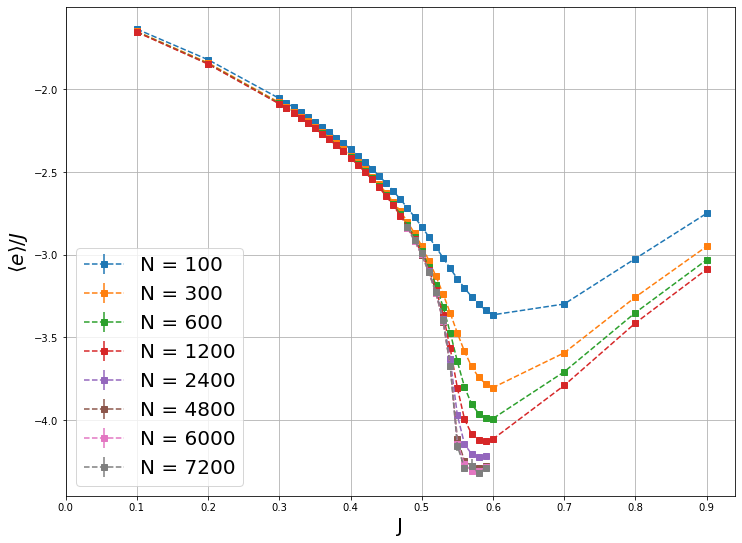

In [9]:
x = 'J'
y_name = 'mean_e_div_J'
ye_name = 'err_mean_e_div_J'

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
for n in Ns:
    dataN = data[(data.N == n) & (data.J > 0)]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
    
#axins=ax.inset_axes([0.05, 0.5, 0.3, 0.45])
#for n in Ns:
#    dataN = data[(data.N == n) & (data.J > 0)]
#    axins.errorbar(x='J', y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
#x1, x2, y1, y2 = 0.407, 0.435, 0.99, 1.25
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
#axins.set_xticks(np.linspace(x1, x2, 6))
#axins.tick_params(direction='in')
#axins.set_xticklabels([])
#axins.set_yticklabels([])
#ax.indicate_inset_zoom(axins, edgecolor="black", label='')


plt.xlabel('J', fontsize=20)
plt.ylabel(r'$\langle e \rangle / J$', fontsize=20)
plt.legend(loc=3, fontsize=20);
plt.xticks(np.linspace(0,0.9,10));
plt.grid();

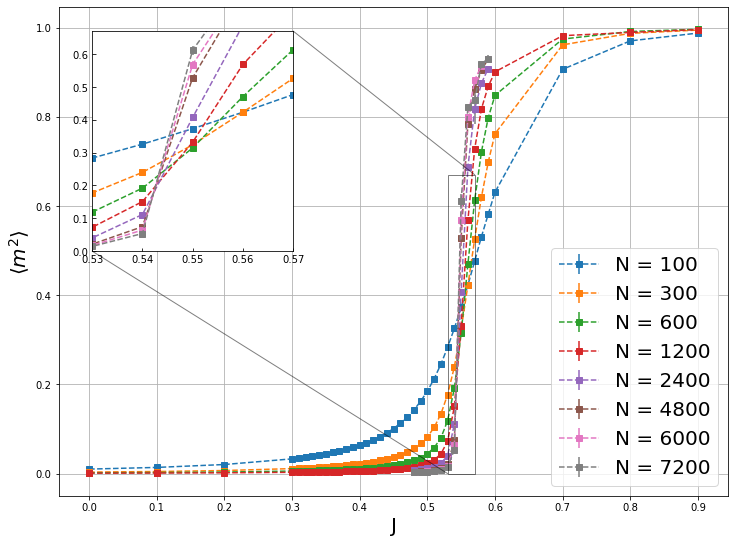

In [10]:
x = 'J'
y_name = 'mean_m_sq'
ye_name = 'err_mean_m_sq'

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
for n in Ns:
    dataN = data[data.N == n]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')

axins=ax.inset_axes([0.05, 0.5, 0.3, 0.45])
for n in Ns:
    dataN = data[data.N == n]
    axins.errorbar(x='J', y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
x1, x2, y1, y2 = 0.532, 0.568, 0., 0.67
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks(np.linspace(round(x1, 2), round(x2,2), 5))
axins.tick_params(direction='in')
#axins.set_xticklabels([])
#axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black", label='')

plt.xlabel('J', fontsize=20)
plt.ylabel(r'$\langle m^2 \rangle$', fontsize=20)
plt.legend(loc=4, fontsize=20);
plt.xticks(np.linspace(0,0.9,10));
plt.grid();

### Генерация ошибок для кумулянта

In [11]:
data['err_mean_m_sq']

0      0.000013
1      0.000006
2      0.000001
3      0.000002
4      0.000021
         ...   
191    0.004577
192    0.000048
193    0.000016
194    0.000005
195    0.001797
Name: err_mean_m_sq, Length: 196, dtype: float64

In [12]:
U4 = 1 - data['mean_m_fourth'] / (3 * data['mean_m_sq'] ** 2)

In [13]:
def predict_error(m4, m4_err, m2, m2_err, length=1000):
    m4_arr = np.random.normal(m4, m4_err, length)
    m2_arr = np.random.normal(m2, m2_err, length)
    U4 = 1 - m4_arr / (3 * m2_arr ** 2)
    return U4.std()

err_U4 = data.apply(lambda x: predict_error(x['mean_m_fourth'], x['err_mean_m_fourth'], x['mean_m_sq'], x['err_mean_m_sq']), axis=1)

In [14]:
data['U4'] = U4
data['err_U4'] = err_U4

In [24]:
data[data.N == 7200]['err_U4']

91     0.025580
99     0.028808
107    0.031731
115    0.032509
123    0.035715
131    0.062944
139    0.198776
147    0.020584
155    0.002937
163    0.052551
171    0.000953
179    0.007595
Name: err_U4, dtype: float64

In [15]:
data[data.N == 7200]

,N,J,h,mean_R_sq,err_mean_R_sq,mean_R_gyr_sq,err_mean_R_gyr_sq,mean_e,err_mean_e,mean_e_sq,...,err_mean_m,mean_m_sq,err_mean_m_sq,mean_m_fourth,err_mean_m_fourth,Unnamed: 19,mean_e_div_J,err_mean_e_div_J,U4,err_U4
91,7200,0.48,0,368184,44918,0.0,NaN,-1.36074,0.002940,1.85324,...,0.000178,0.002530,0.000022,0.000019,3.400130e-07,66550000000,-2.834875,0.006125,-0.001993,0.026029
99,7200,0.49,0,349883,47948,0.0,NaN,-1.42798,0.002751,2.04126,...,0.000213,0.003105,0.000030,0.000029,6.067760e-07,66110000000,-2.914245,0.005614,-0.004808,0.027787
107,7200,0.50,0,389102,123223,0.0,NaN,-1.49613,0.007369,2.24229,...,0.000301,0.003933,0.000045,0.000046,1.042730e-06,60050000000,-2.992260,0.014738,0.016856,0.032544
115,7200,0.51,0,237826,28030,0.0,NaN,-1.58507,0.001979,2.51421,...,0.000313,0.005366,0.000059,0.000085,2.095200e-06,58500000000,-3.107980,0.003881,0.015509,0.031516
123,7200,0.52,0,227953,30031,0.0,NaN,-1.67927,0.003041,2.82215,...,0.000458,0.007865,0.000101,0.000185,4.750940e-06,57160000000,-3.229365,0.005848,0.004455,0.035095
131,7200,0.53,0,192429,36491,0.0,NaN,-1.80056,0.005158,3.24569,...,0.001044,0.014572,0.000321,0.000635,2.915480e-05,57320000000,-3.397283,0.009732,0.003497,0.063310
139,7200,0.54,0,184123,101783,0.0,NaN,-1.98326,0.010537,3.94382,...,0.006338,0.053716,0.003679,0.008759,1.182110e-03,48530000000,-3.672704,0.019514,-0.011901,0.202937
147,7200,0.55,0,129076,117445,0.0,NaN,-2.28705,0.015354,5.24527,...,0.012673,0.611894,0.013964,0.415081,1.222690e-02,23190000000,-4.158273,0.027917,0.630462,0.020225
155,7200,0.56,0,13543,7074,0.0,NaN,-2.40220,0.001487,5.77218,...,0.001638,0.822972,0.002677,0.685222,3.873600e-03,19060000000,-4.289643,0.002656,0.662759,0.002901
163,7200,0.57,0,56156,49898,0.0,NaN,-2.44040,0.024467,5.97986,...,0.045038,0.836842,0.052281,0.739611,5.388360e-02,18100000000,-4.281404,0.042925,0.647957,0.054240


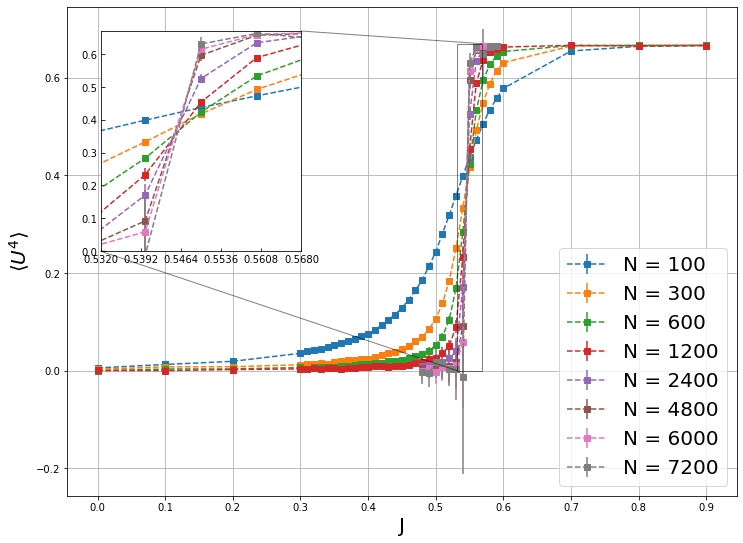

In [28]:
x = 'J'
y_name = 'U4'
ye_name = 'err_U4'

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
for n in Ns:
    dataN = data[data.N == n]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')

axins=ax.inset_axes([0.05, 0.5, 0.3, 0.45])
for n in Ns:
    dataN = data[data.N == n]
    axins.errorbar(x='J', y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
x1, x2, y1, y2 = 0.532, 0.568, 0., 0.67
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks(np.linspace(x1, x2, 6))
axins.tick_params(direction='in')
#axins.set_xticklabels([])
#axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black", label='')


plt.xlabel('J', fontsize=20)
plt.ylabel(r'$\langle U^4 \rangle$', fontsize=20)
plt.legend(loc=4, fontsize=20);
plt.xticks(np.linspace(0,0.9,10));
plt.grid();